# Data Exploration and Pre-processing of data 

### Importing Libraries
Loads libraries for data handling and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset
Loads the dataset and shows the first few rows

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michelle Prince,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,23b8c1e9-3924-46de-beb1-3b9046685257,Diana Mullins,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Brittany Ballard,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew Freeman,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Amy Baker,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No


### Checking Dataset Size
Returns number of rows and columns

In [3]:
df.shape

(9000, 14)

### Checking Column Types
This shows which columns are numeric (for scaling), categorical (for encoding), or text/ID columns (to drop)

In [4]:
df.dtypes

CustomerID              object
Name                    object
Age                      int64
Gender                  object
MaritalStatus           object
EducationLevel          object
EmploymentStatus        object
AnnualIncome             int64
LoanAmountRequested      int64
PurposeOfLoan           object
CreditScore              int64
ExistingLoansCount       int64
LatePaymentsLastYear     int64
LoanApproved            object
dtype: object

### Getting Summary Statistics
Helps spot outliers (e.g., unrealistic credit scores) and get a sense of data distribution

In [5]:
df.describe()

,Age,AnnualIncome,LoanAmountRequested,CreditScore,ExistingLoansCount,LatePaymentsLastYear
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,43.550444,110279.808556,25680.583333,573.193333,2.008444,4.475444
std,14.909264,52147.330689,14116.494549,158.013843,1.414110,2.878403
min,18.000000,20009.000000,1000.000000,300.000000,0.000000,0.000000
25%,31.000000,65443.250000,13564.750000,437.000000,1.000000,2.000000
50%,43.000000,110331.000000,25814.000000,574.000000,2.000000,4.000000
75%,56.000000,155539.250000,37941.500000,708.000000,3.000000,7.000000
max,69.000000,199988.000000,49989.000000,849.000000,4.000000,9.000000


### Checking for Missing Values
Helps decide whether to drop or fill (impute) missing data before modeling

In [6]:
df.isnull().sum()

CustomerID              0
Name                    0
Age                     0
Gender                  0
MaritalStatus           0
EducationLevel          0
EmploymentStatus        0
AnnualIncome            0
LoanAmountRequested     0
PurposeOfLoan           0
CreditScore             0
ExistingLoansCount      0
LatePaymentsLastYear    0
LoanApproved            0
dtype: int64

### Checking for Duplicates
Duplicate records can bias the model, so they need to be removed if present

In [7]:
df.duplicated().sum()

0

### Dropping Irrelevant Columns
CustomerID and Name are identifiers that don’t affect loan approval; keeping them adds noise

In [8]:
df.drop(columns=['CustomerID', 'Name'], inplace=True)

<AxesSubplot:title={'center':'Class Distribution'}, xlabel='LoanApproved'>

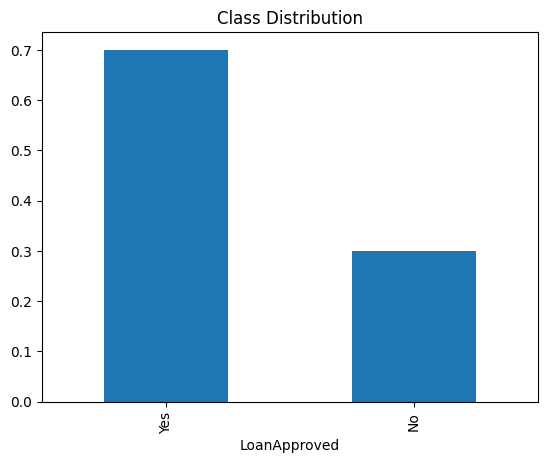

In [9]:
df['LoanApproved'].value_counts(normalize=True).plot(kind='bar', title='Class Distribution')

### Visualizing Numeric Columns
Helps visualize if data is skewed and if normalization is needed

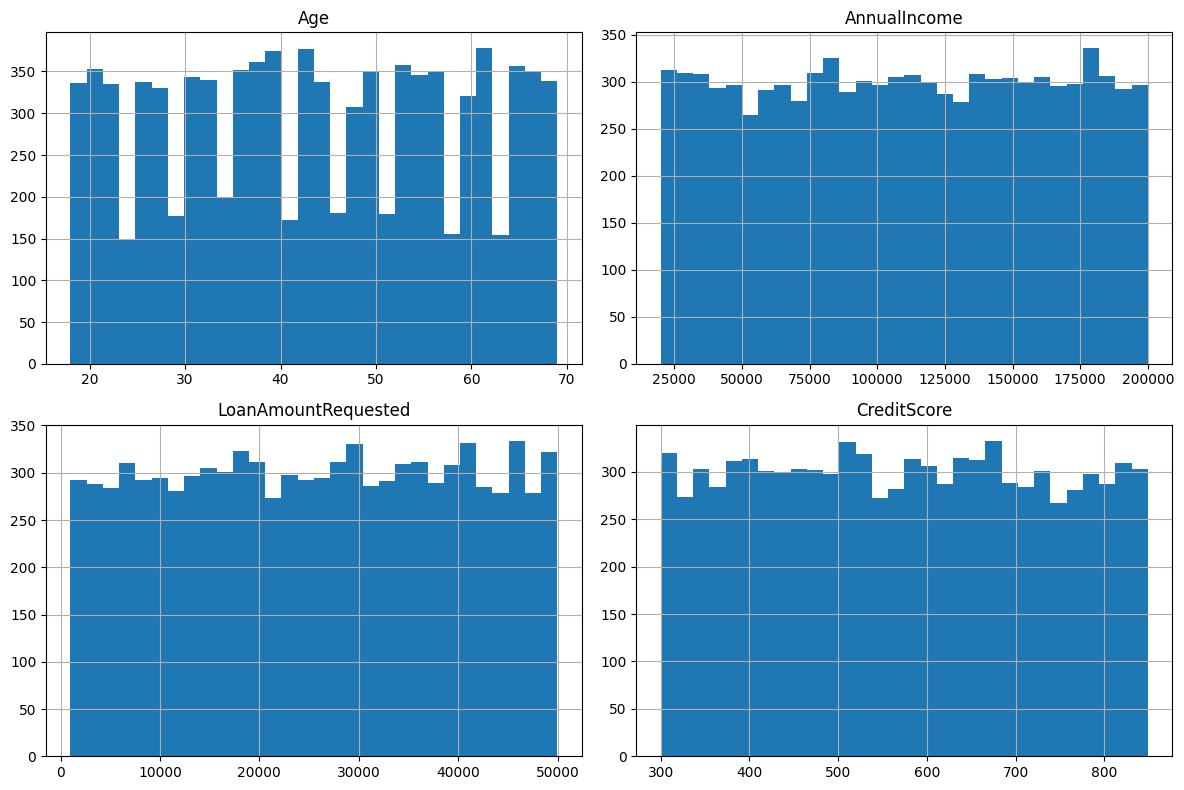

In [10]:
numerical = ['Age', 'AnnualIncome', 'LoanAmountRequested', 'CreditScore']
df[numerical].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

### Visualizing Correlation
Correlation helps detect multicollinearity and which features strongly relate to the target

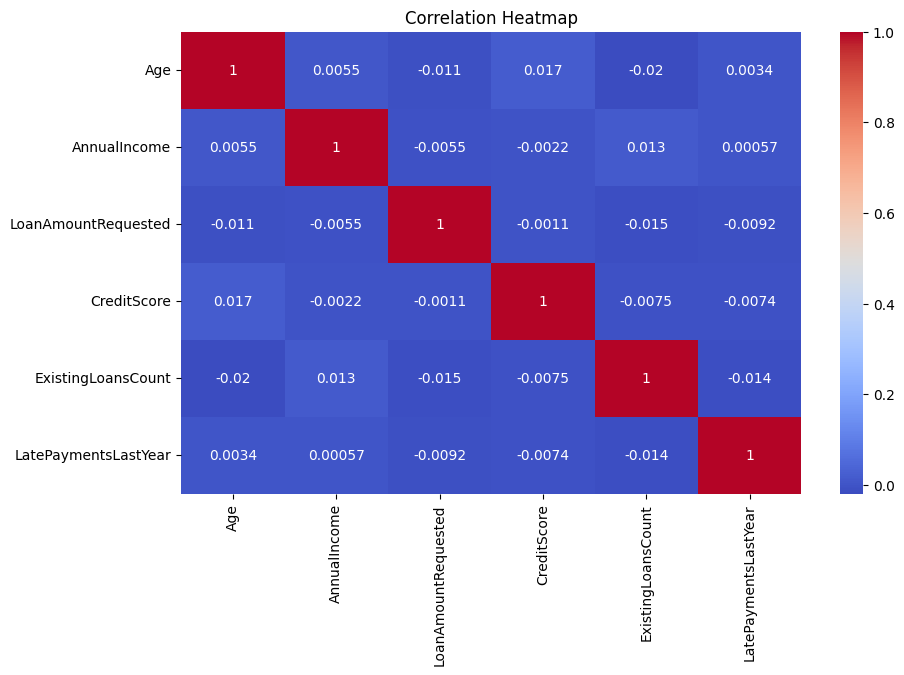

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<AxesSubplot:xlabel='LoanApproved', ylabel='CreditScore'>

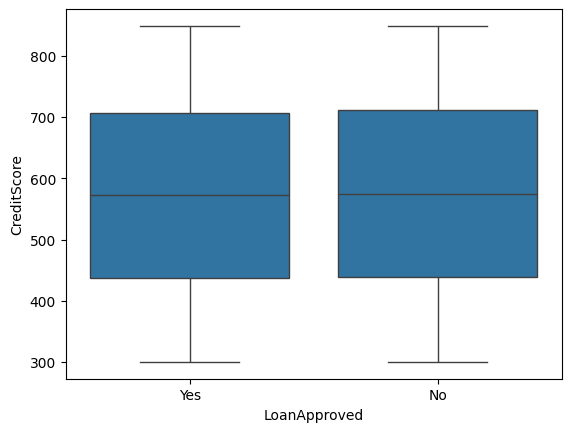

In [12]:
sns.boxplot(x='LoanApproved', y='CreditScore', data=df)

### Visualizing Categorical Columns
Helps check for imbalanced categories which can bias the model

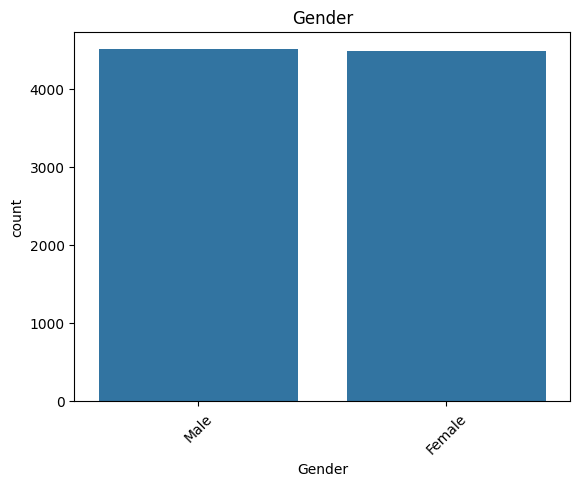

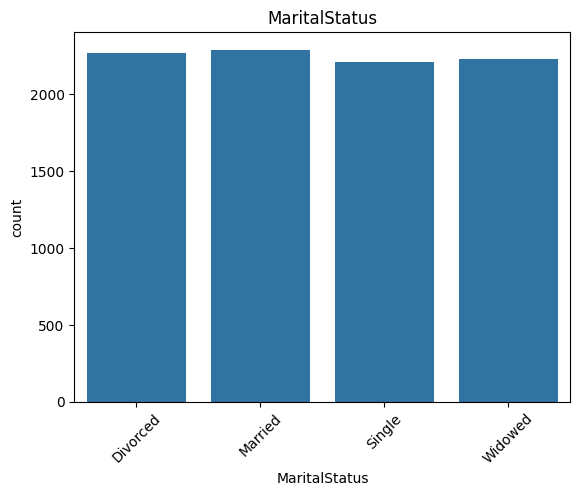

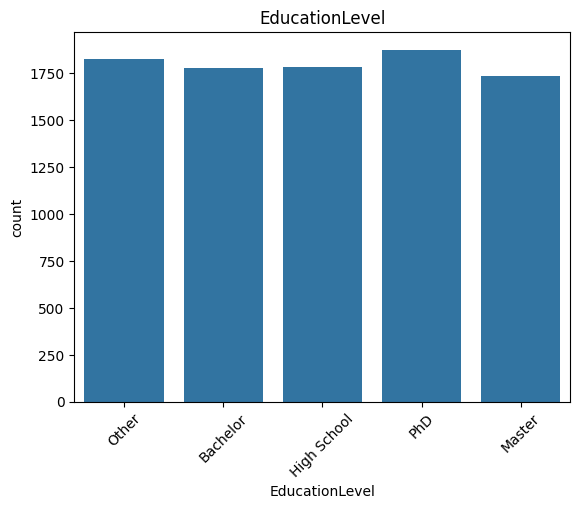

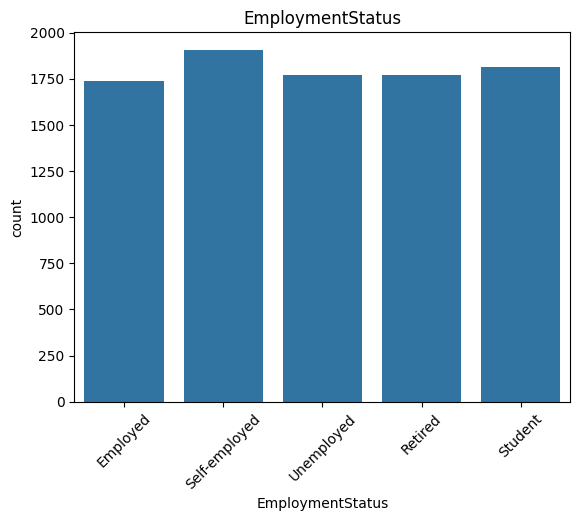

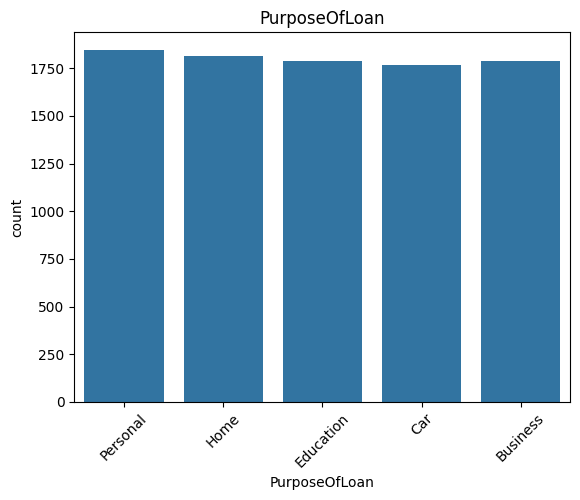

In [13]:
categorical = ['Gender', 'MaritalStatus', 'EducationLevel', 'EmploymentStatus', 'PurposeOfLoan']
for col in categorical:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()


### Feature Engineering
###### IncomePerLoan shows how easily an applicant can repay.
###### DebtBurden combines loan count and late payments for risk evaluation.

In [14]:
df['IncomePerLoan'] = df['AnnualIncome'] / df['LoanAmountRequested']
df['DebtBurden'] = df['ExistingLoansCount'] + df['LatePaymentsLastYear']

### One-Hot Encoding
Prepares categorical variables for ML models; drop_first=True avoids dummy variable trap

In [15]:
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)

In [16]:
df_encoded.head()

,Age,AnnualIncome,LoanAmountRequested,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved,IncomePerLoan,DebtBurden,Gender_Male,...,EducationLevel_Other,EducationLevel_PhD,EmploymentStatus_Retired,EmploymentStatus_Self-employed,EmploymentStatus_Student,EmploymentStatus_Unemployed,PurposeOfLoan_Car,PurposeOfLoan_Education,PurposeOfLoan_Home,PurposeOfLoan_Personal
0,56,97622,46413,500,2,4,Yes,2.103333,6,True,...,True,False,False,False,False,False,False,False,False,True
1,69,96925,24065,532,2,0,Yes,4.027633,2,True,...,False,False,False,False,False,False,False,False,True,False
2,46,167927,46676,795,2,6,Yes,3.597716,8,False,...,False,False,False,True,False,False,False,False,False,True
3,32,112920,27406,376,2,9,No,4.120266,11,False,...,False,True,False,False,False,True,False,True,False,False
4,60,152183,49337,517,3,7,No,3.084561,10,False,...,False,False,False,False,False,True,True,False,False,False


# Model building and evaluation of model 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler




### Encoding Target Column
ML models require numeric targets for classification

In [18]:
df['LoanApproved'] = df['LoanApproved'].map({'Yes': 1, 'No': 0})

In [19]:
categorical_cols = ['Gender', 'MaritalStatus', 'EducationLevel', 'EmploymentStatus', 'PurposeOfLoan']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Separating Features & Target
This split is needed for training ML models

In [20]:
X = df_encoded.drop('LoanApproved', axis=1)
y = df_encoded['LoanApproved']

### Scaling Numeric Features
Prevents large values from dominating the model by bringing all features to a similar scale

In [21]:
scaler = StandardScaler()
numeric_cols = ['Age', 'AnnualIncome', 'LoanAmountRequested', 'CreditScore',
                'LatePaymentsLastYear', 'IncomePerLoan', 'DebtBurden']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

### Splitting Data
Splits data into training (80%) and testing (20%)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Models and Evaluating Models
###### Using multiple models allows performance comparison and selecting the best
###### Confusion matrix shows correct vs incorrect predictions.
###### Classification report gives precision, recall, F1.
###### ROC AUC measures overall discrimination ability (higher is better).

In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    if y_proba is not None:
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    print("\n")

--- Logistic Regression ---
Confusion Matrix:
[[   0  549]
 [   0 1251]]

Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       549
           1     0.6950    1.0000    0.8201      1251

    accuracy                         0.6950      1800
   macro avg     0.3475    0.5000    0.4100      1800
weighted avg     0.4830    0.6950    0.5699      1800

ROC AUC Score: 0.4750


--- Decision Tree ---


C:\Users\Sakuriee\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sakuriee\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sakuriee\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Confusion Matrix:
[[171 378]
 [389 862]]

Classification Report:
              precision    recall  f1-score   support

           0     0.3054    0.3115    0.3084       549
           1     0.6952    0.6890    0.6921      1251

    accuracy                         0.5739      1800
   macro avg     0.5003    0.5003    0.5002      1800
weighted avg     0.5763    0.5739    0.5751      1800

ROC AUC Score: 0.5003


--- Random Forest ---
Confusion Matrix:
[[   8  541]
 [  15 1236]]

Classification Report:
              precision    recall  f1-score   support

           0     0.3478    0.0146    0.0280       549
           1     0.6956    0.9880    0.8164      1251

    accuracy                         0.6911      1800
   macro avg     0.5217    0.5013    0.4222      1800
weighted avg     0.5895    0.6911    0.5759      1800

ROC AUC Score: 0.4946




# Deployment of model as a web application 

### Saving Model
The saved model is loaded in your app.py for deployment, avoiding retraining each time

In [24]:
import joblib
joblib.dump(model, 'loan_model.pkl')

['loan_model.pkl']